# Import the data and plot

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Amazon Deforestation.csv")
df.dropna(inplace=True)
df

,Year,Area in sq km,change in percentage
0,1988,21050.0,0.0
1,1989,17770.0,-16.0
2,1990,13730.0,-23.0
3,1991,11030.0,-20.0
4,1992,13786.0,25.0
5,1993,14896.0,8.0
6,1994,14896.0,0.0
7,1995,29059.0,95.0
8,1996,18161.0,-38.0
9,1997,13227.0,-27.0


In [2]:
df.shape

(30, 3)

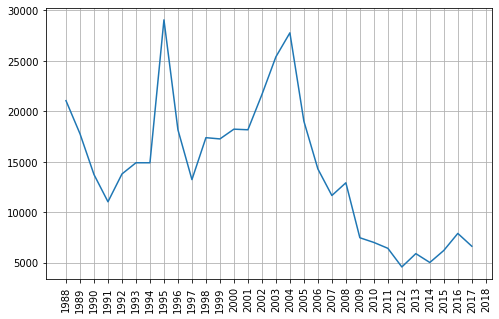

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8, 5), edgecolor='k')
ax.plot(df['Year'], df['Area in sq km'])
ax.xaxis.set_ticks(np.arange(1988,2019,1))
plt.xticks(rotation=90)
plt.grid()
plt.show()

Since it is only 1 variable along the time series, the best model is using the __univariate time series model__

# Preparing the train and test set

In [5]:
#We split our dataset to be able to evaluate our models

tot_results={}
tot_predicts={}

df = pd.read_csv("Amazon Deforestation.csv", parse_dates = ['Year'])
df.dropna(inplace=True)
df.set_index('Year',inplace=True)
nl = '\n'

split_date = '2010-01-01'
df_train = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]
print(f"{len(df_train)} years of training data {nl}{len(df_test)} years of testing data ")

#df_training.to_csv('datasets/training.csv')
#df_test.to_csv('datasets/test.csv')

23 years of training data 
7 years of testing data 


__Let's create naive mean evaluation as our simplest parameter__

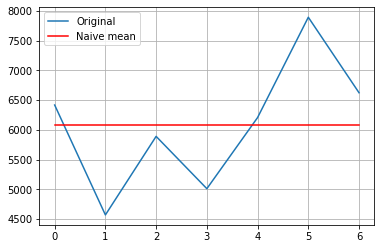

In [6]:
from utils.metrics import evaluate

mean = df_test['Area in sq km'].mean()
mean = np.array([mean for u in range(len(df_test))])
#tot_results['Naive mean'] = evaluate(df_test['Area in sq km'], mean)
#tot_predicts['Naive mean'] = mean

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(mean,color='red',label='Naive mean')
plt.legend()
plt.grid()
plt.show()

# Model using Univariate Time Series

We are going to fit and predict using all the univariate time series model.

### 1.) Autoregression (AR) model

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

__Parameter:__

- p: Trend autoregression order.

__AR function:__ AR(p)


The method is suitable for univariate time series with trend and without seasonal components.

In [10]:
import warnings
warnings.filterwarnings('ignore')

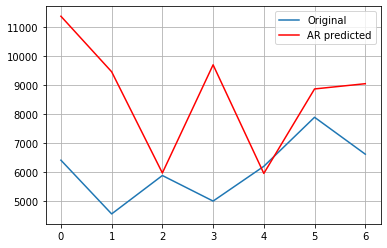

In [11]:
from statsmodels.tsa.ar_model import AR
from random import random

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = AR(new_train['Area in sq km'])
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train), dynamic=False)
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['AR'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['AR'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='AR predicted')
plt.legend()
plt.grid()
plt.show()


### 2.) Moving Average (MA) model

- The Moving Average (MA) method models the next step in the sequence as the average of a window of observations at prior time steps.


- The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q).


- The method is suitable for univariate time series with trend and without seasonal components.

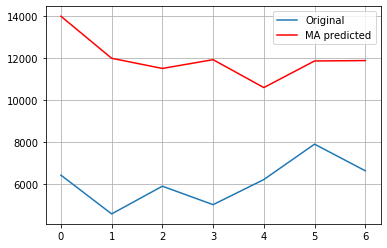

In [12]:
from statsmodels.tsa.arima_model import ARMA
from random import random

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = ARMA(new_train['Area in sq km'], order =(0,1))
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train), dynamic=False)
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['MA'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['MA'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='MA predicted')
plt.legend()
plt.grid()
plt.show()

### 3.) Autoregressive Moving Average (ARMA) model

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.


__Parameters:__

- p: Trend autoregression order.
- q: Trend moving average order.


__ARMA function:__ ARMA(p, q).

The method is suitable for univariate time series with trend and without seasonal components.

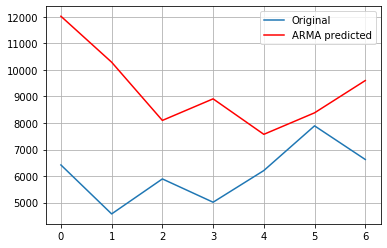

In [13]:
from statsmodels.tsa.arima_model import ARMA
from random import random

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = ARMA(new_train['Area in sq km'], order =(1,1))
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train), dynamic=False)
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['ARMA'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['ARMA'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='ARMA predicted')
plt.legend()
plt.grid()
plt.show()


### 4.) Autoregressive Integrated Moving-Average (ARIMA) model

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps. 

__Parameters:__

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.


__ARIMA function:__ ARIMA(p, d, q)

The method is suitable for univariate time series with trend and without seasonal components.

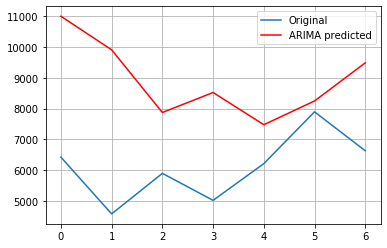

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = ARIMA(new_train['Area in sq km'], order =(1,0,0))
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train), dynamic=False)
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['ARIMA'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['ARIMA'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='ARIMA predicted')
plt.legend()
plt.grid()
plt.show()

### 5.) Seasonal Autoregressive Integrated Moving-Average (SARIMA) model

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.


__Trend Elements:__

There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.


__Seasonal Elements:__

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests a yearly seasonal cycle

__SARIMA function:__ SARIMA(p,d,q)(P,D,Q,m)

The method is suitable for univariate time series with trend and/or seasonal components.

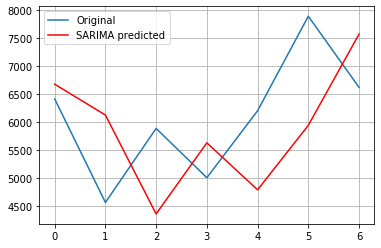

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = SARIMAX(new_train['Area in sq km'], order =(1,0,0), seasonal_order =(0,0,0,3))
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train), dynamic=False)
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['SARIMAX'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['SARIMAX'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='SARIMA predicted')
plt.legend()
plt.grid()
plt.show()

### 6.) Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) model

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

__Auto model__

In [16]:
import pmdarima as pm

autoModel = pm.auto_arima(df_train['Area in sq km'], trace=True, error_action='ignore', 
                          suppress_warnings=True, seasonal=True, m=1, stepwise=True)
autoModel.fit(df_train['Area in sq km'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=465.628, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=459.563, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=460.254, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=517.104, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=460.961, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=461.211, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=463.004, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=463.871, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.705 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

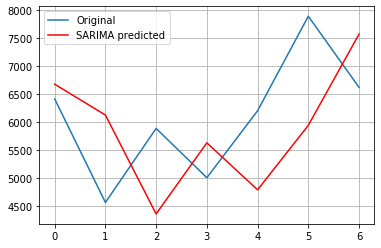

In [17]:
yhat = []
order = autoModel.order
seasonalOrder = autoModel.seasonal_order

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = SARIMAX(new_train['Area in sq km'], order = order, seasonal_order = seasonalOrder)
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train), dynamic=False)
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['AUTOSARIMAX {0},{1}'.format(order,seasonalOrder)] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['AUTOSARIMAX {0},{1}'.format(order,seasonalOrder)] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='SARIMA predicted')
plt.legend()
plt.grid()
plt.show()

### 7.) Simple Exponential Smoothing (SES) model

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

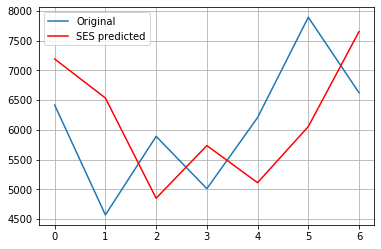

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = SimpleExpSmoothing(new_train['Area in sq km'])
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train))
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['SES'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['SES'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='SES predicted')
plt.legend()
plt.grid()
plt.show()

### 8.) Holt Winter’s Exponential Smoothing (HWES) model

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

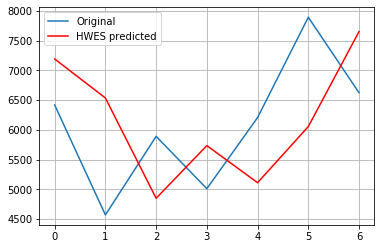

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

yhat = []

for x in range(len(df_test['Area in sq km'])):
    new_train = df[:len(df_train)+x]
    model = ExponentialSmoothing(new_train['Area in sq km'])
    model = model.fit()
    pred = model.predict(len(new_train), len(new_train))
    yhat = yhat + [pred]
    
yhat = pd.concat(yhat)
tot_results['HWES'] = evaluate(df_test['Area in sq km'], yhat.values)
tot_predicts['HWES'] = yhat.values

plt.plot(df_test['Area in sq km'].values, label='Original')
plt.plot(yhat.values,color='red',label='HWES predicted')
plt.legend()
plt.grid()
plt.show()

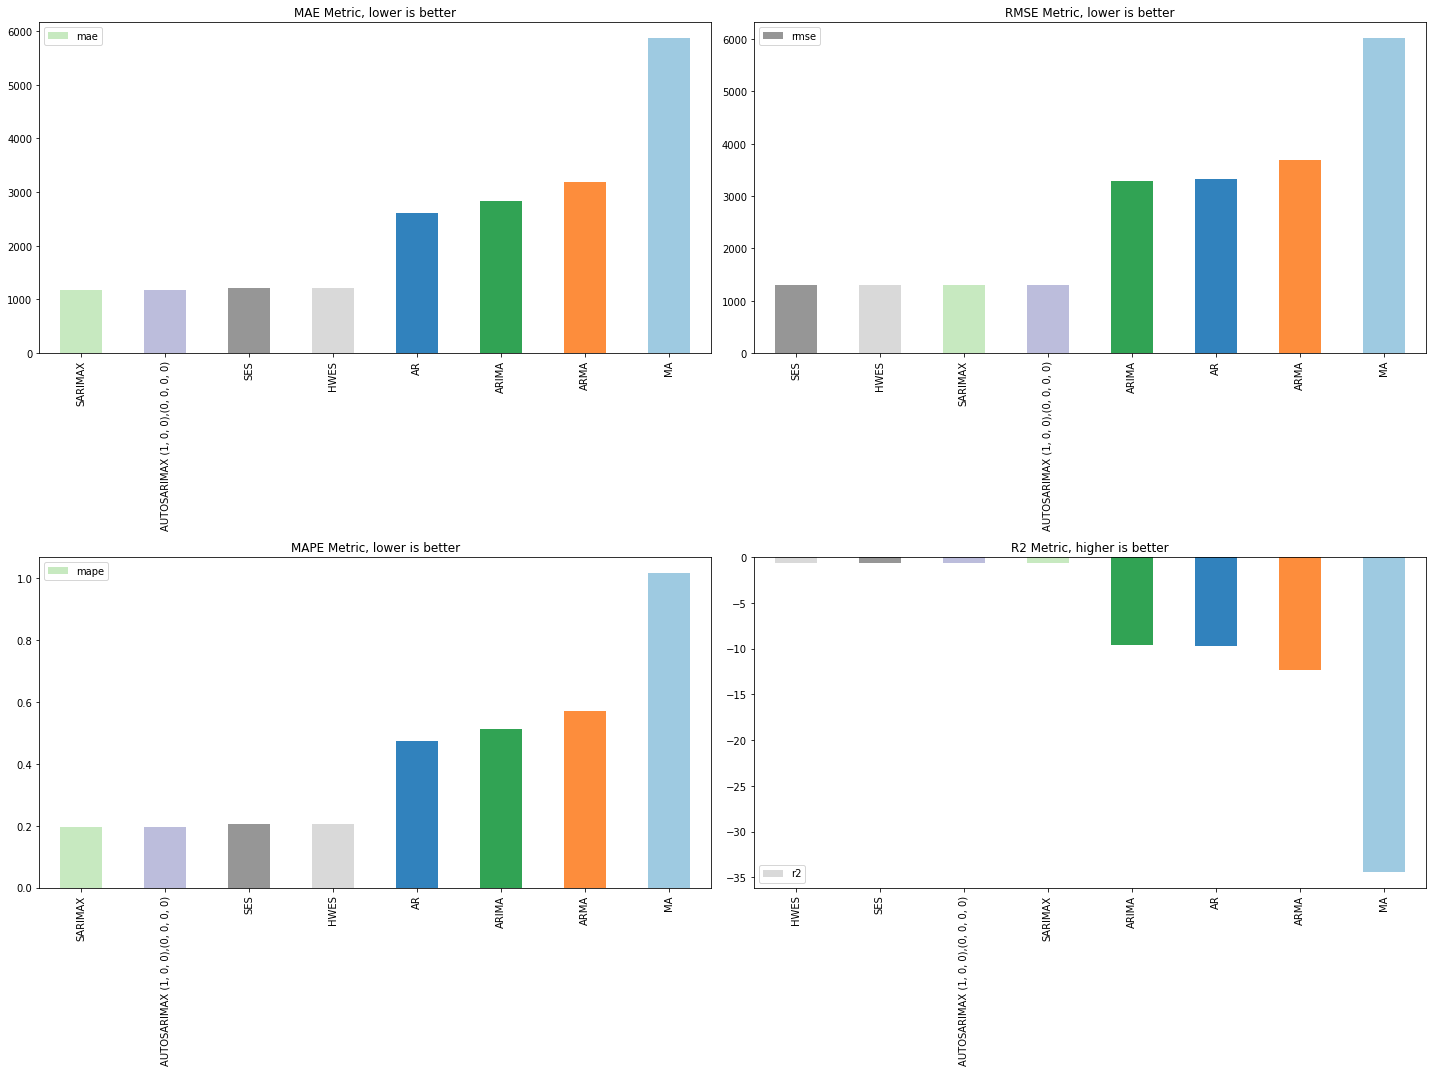

In [20]:
from utils.plots import bar_metrics

bar_metrics(tot_results)

Finally, by choosing __small MAE, RMSE, MAPE__ and __high R-squared__ we can see there are couple reliable models for our Amazon deforestation prediction data:
- Holt Winter’s Exponential Smoothing (HWES)
- Simple Exponential Smoothing (SES)
- Seasonal Autoregressive Integrated Moving-Average (SARIMA)
- Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [21]:
og = pd.read_csv("Amazon Deforestation.csv", parse_dates = ['Year'])

og.set_index('Year',inplace=True)
nl = '\n'

split_date = '2010-01-01'
df_train = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]

print(f"{len(df_train)} years of training data {nl}{len(df_test)} years of testing data ")

23 years of training data 
7 years of testing data 


In [22]:
og.shape

(43, 2)

In [23]:
# yhat = []

# for x,j in zip(range(20),range(25)):
#    new_train = xx[:len(df_train)+x]
#    model = ExponentialSmoothing(new_train['Area in sq km'])
#    model = model.fit()
#    pred = model.predict(len(new_train), len(new_train))
#    yhat = yhat + [pred]
#    if [x for x in og.index][23+j] >= datetime.strptime('2018-01-01', '%Y-%m-%d'):
#        og['Area in sq km'][23+x]=pred[0]
#    else:
#        pass
#yhat = pd.concat(yhat) 
#print(yhat)
#fig, ax = plt.subplots(figsize=(7,7))
#ax.plot(df_test['Area in sq km'].values, label='Original')
#ax.plot(yhat.values,color='red',label='HWES predicted')
#plt.legend()
#plt.grid()
#plt.plot()